# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Welcome In my Notebook</p>

 <p style="background-color:Tomato;font-family:newtimeroman;color:black;font-size:150%;text-align:center;border-radius:20px 60px;">I hope you Like it. and Don't forget to apvote.</p>

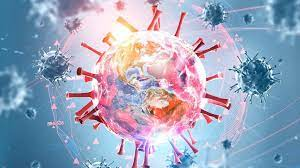

   ## Here we have a problem statment.
     * predict the total number of cinfirmed cases

 <a id="1"></a>
<p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Importing Libraries</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fbprophet
from fbprophet import Prophet
import plotly.express as px
#### The prophet model identifies points at which the trend changes and those can be plotted.¶
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

<a id="2"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Loading Data</p>

In [2]:
#Loading Data
df=pd.read_csv('../input/covid-19-clean-complete/covid_19_clean_complete.csv')
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,1/22/2020,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,1/22/2020,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,1/22/2020,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,1/22/2020,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,1/22/2020,0,0,0,0,Africa


In [3]:
#print the some of the information about data
print("The shape of data",df.shape)
print("-------------------------------")
print("The information for data",df.info())


The shape of data (49068, 10)
-------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB
The information for data None


In [4]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [5]:
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
dtype: object

### Cheack NAN value

In [6]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [7]:
df['Date'].nunique()

188

### Here we can make agroupby (Date)

In [8]:
total=df.groupby(['Date'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()
total

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010
...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006
184,2020-07-24,15791645,639650,8939705,6212290
185,2020-07-25,16047190,644517,9158743,6243930
186,2020-07-26,16251796,648621,9293464,6309711


In [9]:
#we can rename the columns of data(total)
df_prophet=total.rename(columns={'Date':'ds','Confirmed':'y'})
df_prophet.head()

,ds,y,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [10]:
#cheack if has null values
df_prophet.isna().sum()

ds           0
y            0
Deaths       0
Recovered    0
Active       0
dtype: int64

<a id="3.2"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Ploting Data</p>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Deaths', ylabel='Recovered'>

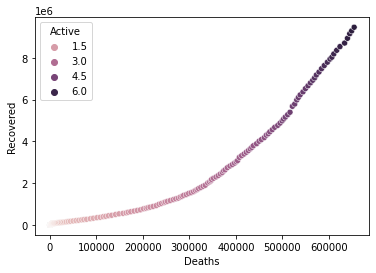

In [11]:
sns.scatterplot(df_prophet['Deaths'], df_prophet['Recovered'], hue = df_prophet['Active'])

In [12]:
px.scatter(df_prophet, x="Deaths", y="Recovered", color="Active")

#### We also see that the cases of death have begun to decrease sharply and the number of hospitalizations has increased, and this is a good thing for all.

In [13]:
px.parallel_coordinates(df_prophet, color="Active",) 

In [14]:
px.histogram(df_prophet, x="Deaths", y="Recovered", color="Active")

In [15]:
px.scatter_polar(df_prophet, r="Deaths", theta="Recovered")

<a id="3.2"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Creat Model by using Prophet </p>


In [16]:
m=Prophet()

In [17]:
model=m.fit(df_prophet)

In [18]:
model.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

### Make a prediction
    for Now going to do forecasting so to do forecasting I need some Future Days

In [19]:
### ### now I am going to do forecasting so to do forecasting I need some Future Days 
future_global=model.make_future_dataframe(periods=30,freq='D')
future_global

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
213,2020-08-22
214,2020-08-23
215,2020-08-24
216,2020-08-25


In [20]:
df_prophet.shape

(188, 5)

In [21]:
future_global.shape

(218, 1)

##### we see the different in the shape for future_global and df_prophet 

In [22]:
df_prophet['ds'].tail()

183   2020-07-23
184   2020-07-24
185   2020-07-25
186   2020-07-26
187   2020-07-27
Name: ds, dtype: datetime64[ns]

In [23]:
### now do Prediction on future_global
prediction=model.predict(future_global)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.323896e+03,-1.297323e+05,8.774862e+04,-9.323896e+03,-9.323896e+03,-10979.704311,-10979.704311,-10979.704311,-10979.704311,-10979.704311,-10979.704311,0.0,0.0,0.0,-2.030360e+04
1,2020-01-23,-6.626094e+03,-1.110300e+05,8.794266e+04,-6.626094e+03,-6.626094e+03,-1101.212489,-1101.212489,-1101.212489,-1101.212489,-1101.212489,-1101.212489,0.0,0.0,0.0,-7.727307e+03
2,2020-01-24,-3.928293e+03,-9.681815e+04,1.155159e+05,-3.928293e+03,-3.928293e+03,10055.768575,10055.768575,10055.768575,10055.768575,10055.768575,10055.768575,0.0,0.0,0.0,6.127475e+03
3,2020-01-25,-1.230492e+03,-9.386097e+04,1.177734e+05,-1.230492e+03,-1.230492e+03,13728.634691,13728.634691,13728.634691,13728.634691,13728.634691,13728.634691,0.0,0.0,0.0,1.249814e+04
4,2020-01-26,1.467309e+03,-9.767620e+04,1.091464e+05,1.467309e+03,1.467309e+03,7278.808727,7278.808727,7278.808727,7278.808727,7278.808727,7278.808727,0.0,0.0,0.0,8.746118e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2020-08-22,2.144165e+07,2.105490e+07,2.182352e+07,2.106446e+07,2.180295e+07,13728.634691,13728.634691,13728.634691,13728.634691,13728.634691,13728.634691,0.0,0.0,0.0,2.145538e+07
214,2020-08-23,2.164576e+07,2.123762e+07,2.204867e+07,2.124869e+07,2.202497e+07,7278.808727,7278.808727,7278.808727,7278.808727,7278.808727,7278.808727,0.0,0.0,0.0,2.165304e+07
215,2020-08-24,2.184988e+07,2.140958e+07,2.227448e+07,2.142968e+07,2.225994e+07,-2146.590152,-2146.590152,-2146.590152,-2146.590152,-2146.590152,-2146.590152,0.0,0.0,0.0,2.184773e+07
216,2020-08-25,2.205399e+07,2.159144e+07,2.249185e+07,2.161123e+07,2.248815e+07,-16835.705042,-16835.705042,-16835.705042,-16835.705042,-16835.705042,-16835.705042,0.0,0.0,0.0,2.203715e+07


### Now we make a prediction for date on feture_global

In [24]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
213,2020-08-22,2.145538e+07,2.105490e+07,2.182352e+07
214,2020-08-23,2.165304e+07,2.123762e+07,2.204867e+07
215,2020-08-24,2.184773e+07,2.140958e+07,2.227448e+07
216,2020-08-25,2.203715e+07,2.159144e+07,2.249185e+07
217,2020-08-26,2.224712e+07,2.175414e+07,2.271138e+07


<a id="3.2"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Plorting The prediction</p>

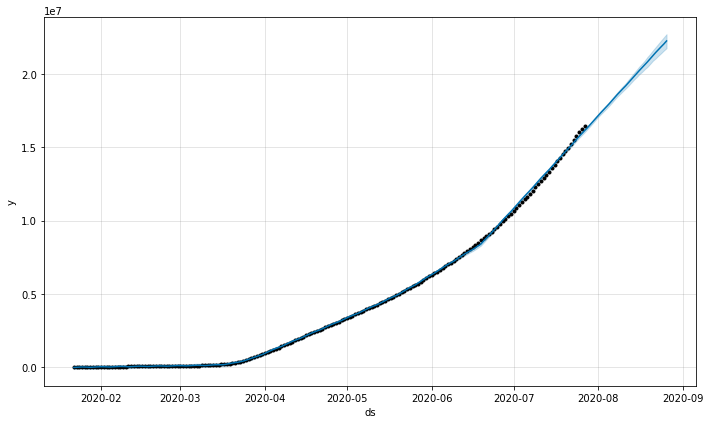

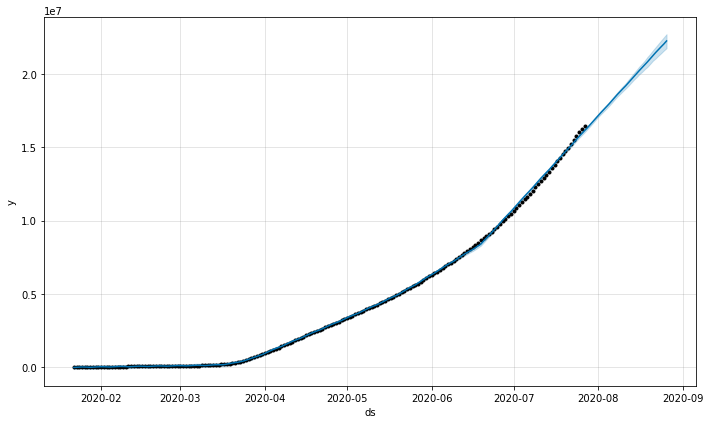

In [25]:
#plot the  prediction 
model.plot(prediction)

### Conclusion--> This is what our prediction looks like. The direction of overall case numbers is probably true, u will observe how cases rises exponentially

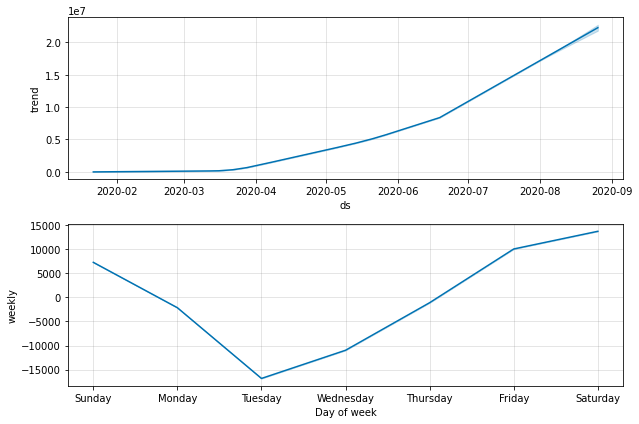

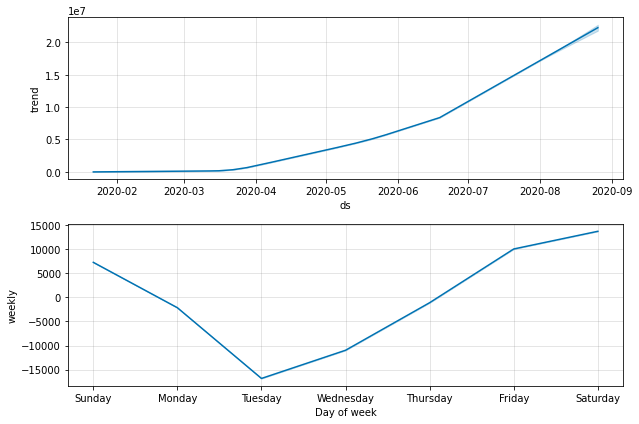

In [26]:
model.plot_components(prediction)

[[<matplotlib.lines.Line2D at 0x7f61d4734950>],

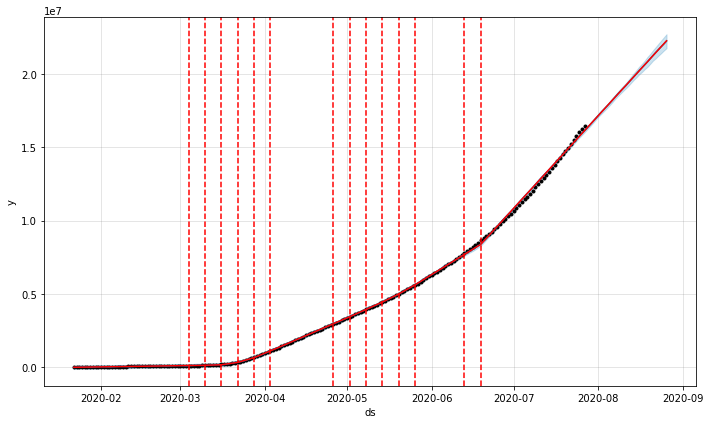

In [27]:
fig=model.plot(prediction)

a=add_changepoints_to_plot(fig.gca(),model,prediction)
a

In [28]:
df_cv=cross_validation(model,horizon='30 days',period='15 days',initial='90 days')
df_cv
## horizon='365 days'--> for how many days we have to cross validate=====

## Computes forecasts from historical cutoff points Beginning from..

## (end - horizon) it means it is going to take that date that is (end - horizon) bcz on these date we have to just 
## cross-validate for the new dataset that we have to find out

## period=180 as from documentation of func as period=0.5*365=180 or {period=1/2*horizon value}
## initial -How many total no. of days we actually want-- 3*365 from documentation of function or  {initial=3*horizon}

  0%|          | 0/5 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-29,3.201064e+06,3.196159e+06,3.206419e+06,3185195,2020-04-28
1,2020-04-30,3.285432e+06,3.278692e+06,3.291697e+06,3268876,2020-04-28
2,2020-05-01,3.369640e+06,3.361219e+06,3.376888e+06,3355922,2020-04-28
3,2020-05-02,3.450902e+06,3.437843e+06,3.461901e+06,3437608,2020-04-28
4,2020-05-03,3.530365e+06,3.512543e+06,3.545863e+06,3515244,2020-04-28
...,...,...,...,...,...,...
145,2020-07-23,1.315183e+07,1.290531e+07,1.342199e+07,15510481,2020-06-27
146,2020-07-24,1.329130e+07,1.303502e+07,1.357177e+07,15791645,2020-06-27
147,2020-07-25,1.342763e+07,1.314283e+07,1.373829e+07,16047190,2020-06-27
148,2020-07-26,1.354631e+07,1.325691e+07,1.387196e+07,16251796,2020-06-27


#### Obtaining the Performance Metrics
    We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.


In [29]:
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,2.721596e+10,164972.604876,129190.213315,0.016867,0.017675,0.000000
1,4 days,3.770271e+10,194171.855844,151379.846239,0.019330,0.022485,0.000000
2,5 days,5.170151e+10,227379.657369,175214.816680,0.021780,0.025717,0.066667
3,6 days,6.937441e+10,263390.225361,202192.647173,0.024558,0.026714,0.133333
4,7 days,9.012810e+10,300213.430311,232530.254272,0.027838,0.031274,0.200000


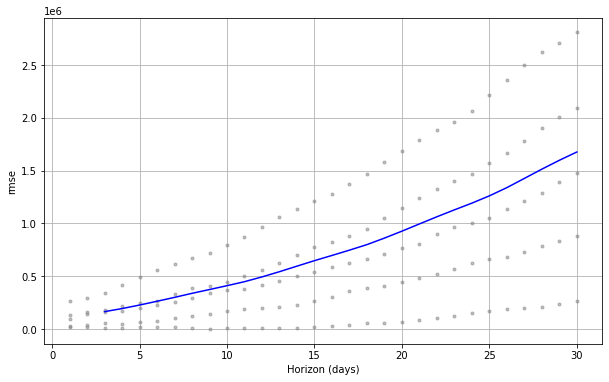

In [30]:
#plot the df_cv('rmse')
df_performance=plot_cross_validation_metric(df_cv,metric='rmse')

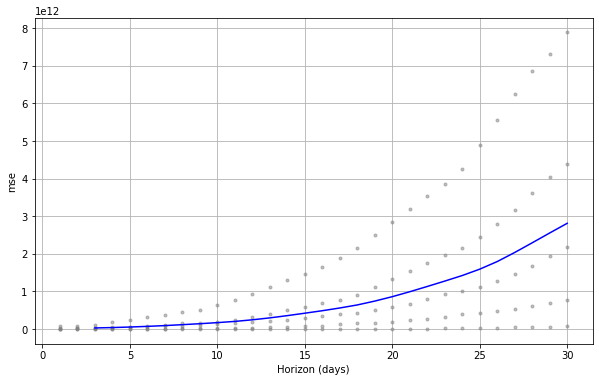

In [31]:
#plot the df_cv('mse')
df_performance=plot_cross_validation_metric(df_cv,metric='mse')

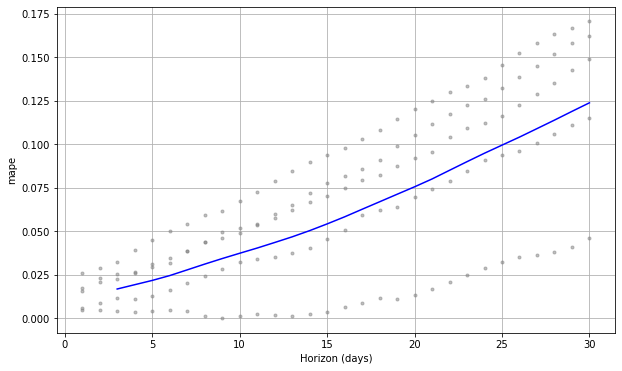

In [32]:
#plot by using ('mape')
df_performance=plot_cross_validation_metric(df_cv,metric='mape')

<a id="3.2"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">This is the End for this project Thank you for every thing see you in next work. </p>